In [3]:
# Exploratory Data Analysis: Heart Disease Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Shape and structure
print("Dataset shape:", df.shape) # 918 Rows(patients/records), 12 columns(features)
df.info()
df.describe()


Dataset shape: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Check for missing values
df.isnull().sum() # There is no missing values in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

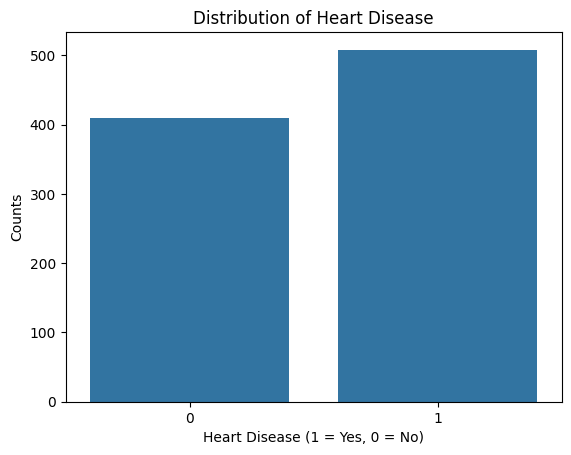

In [6]:
# Target Variable Distribution
df['HeartDisease'].value_counts() 
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Counts')
plt.show()

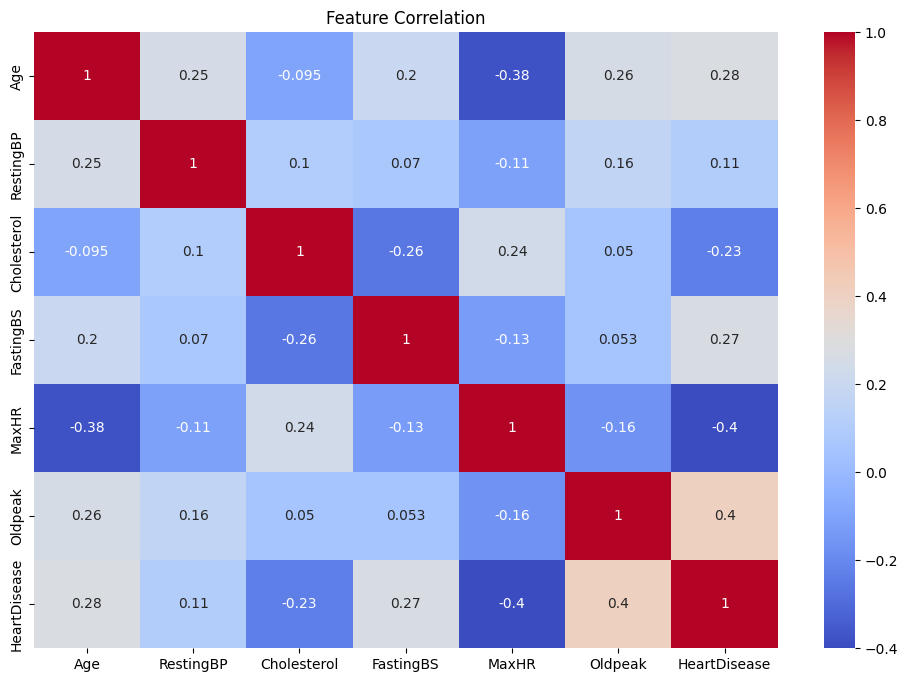

In [7]:
# Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm") # This heatmap only consider numerical values not categorical
plt.title('Feature Correlation')
plt.show()


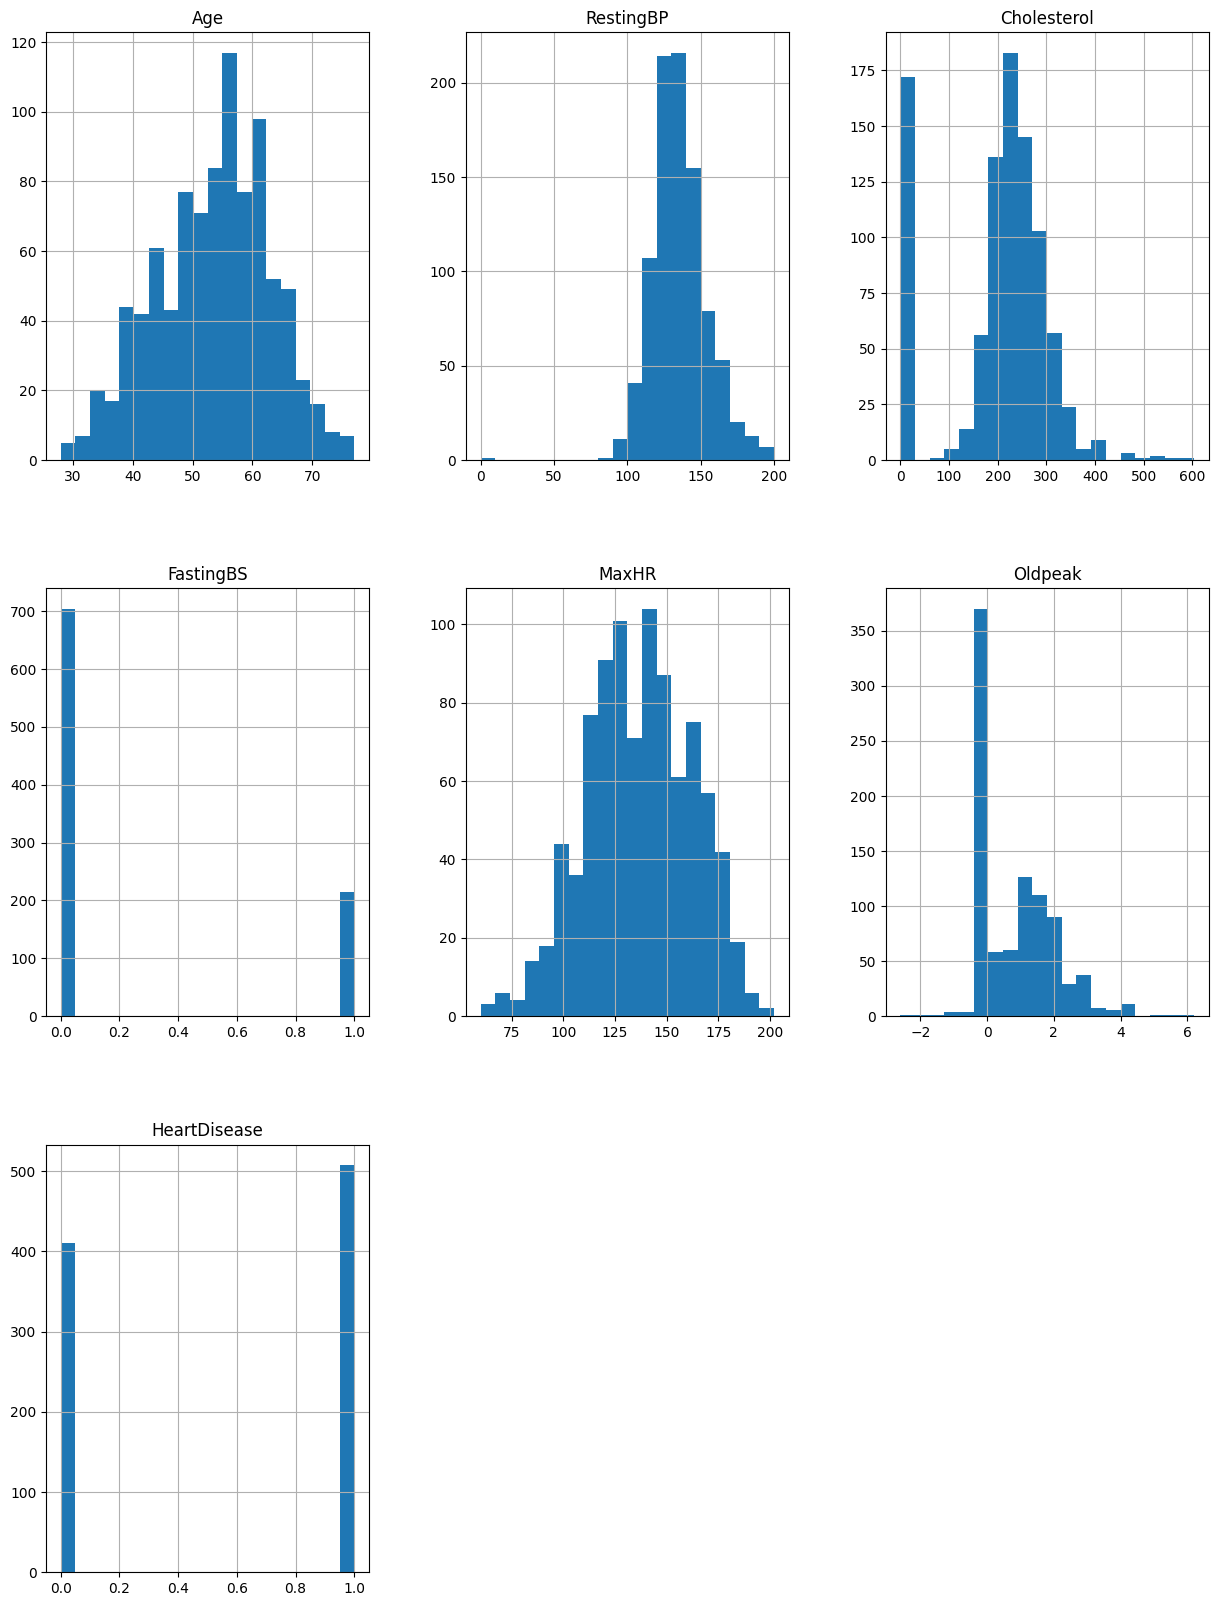

In [8]:
# Histograms for all numeric features
df.hist(figsize=(15, 20), bins=20)
plt.show()

HeartDisease         0         1
Sex                             
F             0.740933  0.259067
M             0.368276  0.631724


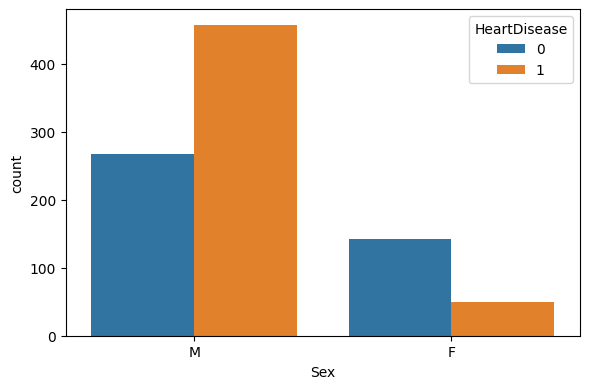

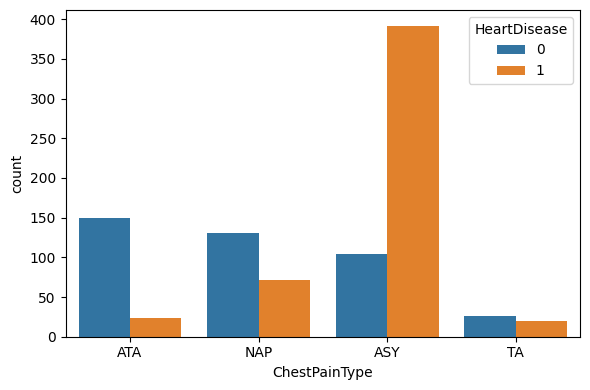

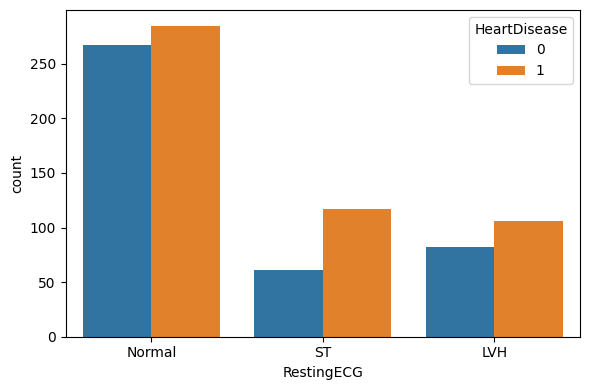

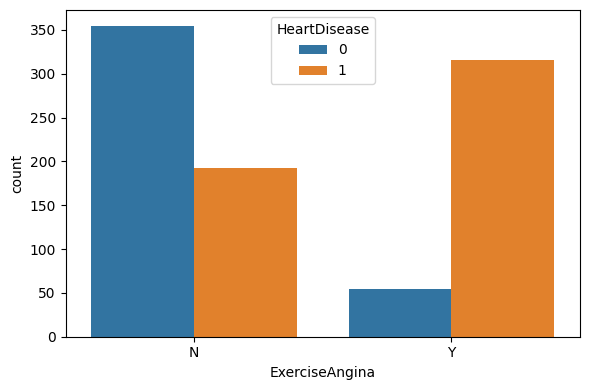

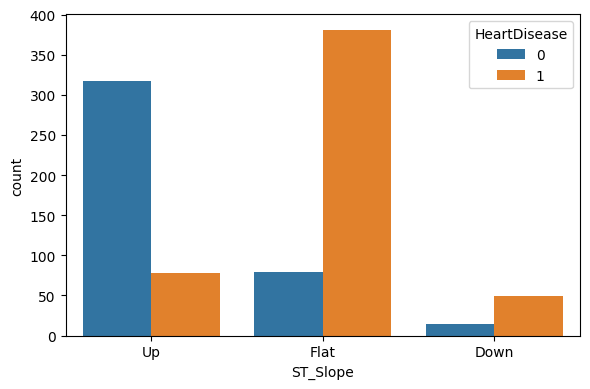

In [16]:
# Distribution of Categorical Features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
print(pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index'))

for col in categorical_cols:
   plt.figure(figsize=(6, 4))
   sns.countplot(data=df, x=col, hue="HeartDisease")
   plt.tight_layout()
   plt.show()
